<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/AdEaseTimeSeries_CaseStudy_Mariya_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
AdEase is trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that it can predict and optimize the ad placement for it's clients.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# test_df = pd.read_csv('https://drive.google.com/file/d/1qQkymAitU6l2pSe702rDUhQpoP8MUZXl/view?usp=share_link')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Exog_Campaign_eng to Exog_Campaign_eng


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_1.csv to train_1.csv


In [26]:
# Import the required libraries
# Libraries for Data Processing
import numpy as np
import pandas as pd
import scipy.stats
import re
import io

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm


In [ ]:
for fn in uploaded.keys():
  print('The file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

NameError: ignored

In [27]:
exog_df = pd.read_csv('Exog_Campaign_eng')

In [ ]:
exog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [ ]:
exog_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
exog_df.shape

(550, 1)

In [30]:
# data_df = pd.read_csv('https://drive.google.com/file/d/1qQkymAitU6l2pSe702rDUhQpoP8MUZXl/view?usp=share_link')
# data_df = pd.read_csv('https://drive.google.com/file/d/1JSOdwBweD3TpsdiSiHH82WC7GZxYCqUr/view?usp=share_link')
data_df = pd.read_csv('/content/sample_data/train_1.csv')


In [31]:
data_df.shape

(7075, 551)

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 29.7+ MB


In [33]:
data_df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
data_df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,6.526900e+04,6.519600e+04,6.528200e+04,6.522400e+04,6.521300e+04,6.530200e+04,6.530100e+04,6.542400e+04,6.537200e+04,6.534100e+04,...,7.542900e+04,7.561600e+04,7.564100e+04,7.559600e+04,7.536400e+04,7.545000e+04,7.547500e+04,7.542700e+04,7.558800e+04,7.545200e+04
mean,1.665323e+03,1.661224e+03,1.578203e+03,1.635322e+03,1.689025e+03,1.815994e+03,1.732298e+03,1.653014e+03,1.670547e+03,1.651844e+03,...,1.991177e+03,1.915270e+03,1.967390e+03,2.065056e+03,2.307318e+03,2.379116e+03,2.321626e+03,2.428203e+03,2.073669e+03,2.071274e+03
std,9.875125e+04,1.006495e+05,9.454025e+04,9.885023e+04,1.004858e+05,1.097653e+05,1.030297e+05,9.248150e+04,9.716711e+04,9.813428e+04,...,1.161503e+05,1.044181e+05,1.150919e+05,1.184085e+05,1.326983e+05,1.250415e+05,1.243726e+05,1.221069e+05,1.103067e+05,1.205160e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,2.300000e+01,2.100000e+01,2.200000e+01,2.200000e+01,2.100000e+01,2.400000e+01,2.300000e+01,2.500000e+01,2.300000e+01,...,2.800000e+01,2.800000e+01,2.400000e+01,2.500000e+01,2.700000e+01,2.900000e+01,3.100000e+01,3.000000e+01,3.000000e+01,2.800000e+01
50%,1.440000e+02,1.440000e+02,1.380000e+02,1.350000e+02,1.470000e+02,1.500000e+02,1.500000e+02,1.530000e+02,1.530000e+02,1.460000e+02,...,1.910000e+02,1.820000e+02,1.620000e+02,1.740000e+02,1.950000e+02,2.060000e+02,2.100000e+02,2.060000e+02,1.985000e+02,1.710000e+02
75%,6.030000e+02,5.980000e+02,5.730000e+02,5.440000e+02,6.040000e+02,6.380000e+02,6.310000e+02,6.372500e+02,6.330000e+02,6.070000e+02,...,7.060000e+02,6.910000e+02,6.500000e+02,6.870000e+02,7.330000e+02,7.630000e+02,7.540000e+02,7.580000e+02,7.480000e+02,6.760000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [34]:
df = data_df.copy(deep=True)

In [35]:
df.isnull().any(axis=1).sum()

1352

# Data Pre-Processing
SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN has to be separated into Title, Language, Access Type and Access Origin

In [40]:
work_df = df['Page'].str.extract(r'wikipedia\.org_([A-Za-z-_]+)')[0]
work_df = work_df.str.split('_', expand=True)
work_df = pd.concat([work_df, df], axis=1).rename(columns={0:'access_type', 1:'access_origin'})
language = work_df['Page'].str.extract(r"_([A-Za-z]{2}).wikipedia.org_")
work_df = pd.concat([language, work_df], axis=1).rename(columns={0:"language"})
work_df['Page'] = work_df['Page'].str.replace(r'(_[A-Za-z]{2}.wikipedia.[A-Za-z_-]+)','',regex=True)
work_df = work_df.rename(columns={'Page':'title'})
data_df = work_df.copy()

In [41]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [42]:
lang_dict = {'es':'spanish', 'zh':'chinese', 'ru':'russian', 'fr':'french', 'de':'german', 'en':'english', 'ja':'japanese'}
data_df['language'] = data_df['language'].map(lang_dict)

In [43]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,chinese,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### Chcek for Missing Values

In [50]:
data_df.isnull().sum()

language            0
access_type         0
access_origin       0
title               0
2015-07-01       1217
                 ... 
2016-12-27         66
2016-12-28         69
2016-12-29         66
2016-12-30         64
2016-12-31         64
Length: 554, dtype: int64

In [51]:
print(round(data_df.isna().any(axis=1).sum() / data_df.shape[0]*100,2), '% null rows')

19.11 % null rows


In [55]:
data_df.dropna().shape[0] / data_df.shape[0]

0.808904593639576

In [56]:
data_df.dropna(inplace=True)

In [57]:
data_df.shape

(5723, 554)

# Exploratory Data Analysis (EDA)

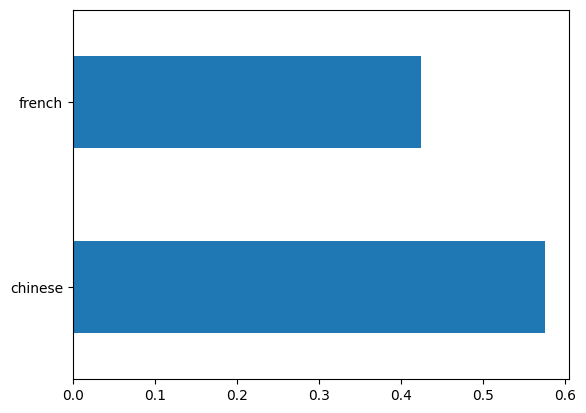

In [58]:
data_df['language'].value_counts(normalize=True).plot(kind='barh')
plt.show()

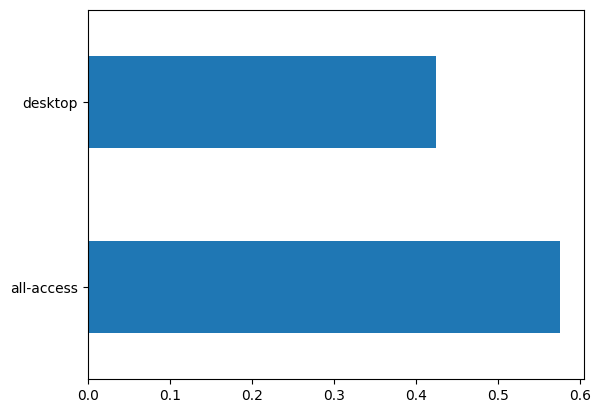

In [59]:
data_df['access_type'].value_counts(normalize=True).plot(kind='barh')
plt.show()

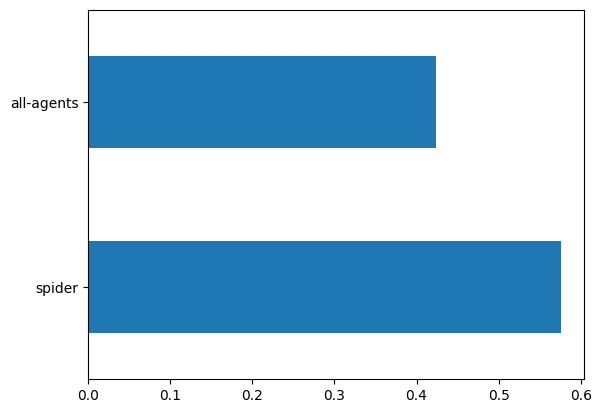

In [60]:
data_df['access_origin'].value_counts(normalize=True).plot(kind='barh')
plt.show()

### Convert the data format

In [61]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,chinese,all-access,spider,5566,12.0,7.0,4.0,5.0,20.0,8.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [63]:
data_df.columns[4:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [64]:
data_df.group = data_df.groupby(['language'])[data_df.columns[4:]].median()

In [65]:
data_TS = data_df.group.T

In [66]:
data_TS.index = np.vectorize(lambda x: np.datetime64(x))(data_TS.index)

In [67]:
data_TS.shape

(550, 2)